**For comparing optimizers, so far we were working with adam optimizer. So now we will try model 8 but with a different optimizer.**

Taking Model 8 (LeakyReLU) as it has best accuracy and lowest test loss, generalizes well and trains quickly, which makes it perfect for further tuning.

## **Model 9: Medium CNN + LeakyReLU with SGD + Momentum**

**Preprocessing from model 2**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


**With Leaky ReLU**
> Architecture From Model 8
- Conv2D(32) → LeakyReLU → MaxPool
- Conv2D(64) → LeakyReLU → MaxPool
- Conv2D(128) → LeakyReLU → MaxPool
- Flatten → Dense(128, LeakyReLU) → Dense(4, softmax)

In [9]:
def build_medium_cnn_leakyrelu(input_shape=(128,128,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model9 = build_medium_cnn_leakyrelu()
model9.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

**Callbacks**

In [10]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/model09_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

**Compile with SGD + momentum**

In [11]:
model9.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [12]:
history9 = model9.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5480 - loss: 1.0167
Epoch 1: val_loss improved from None to 0.49322, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.6762 - loss: 0.7874 - val_accuracy: 0.8098 - val_loss: 0.4932 - learning_rate: 0.0100
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8147 - loss: 0.4856
Epoch 2: val_loss improved from 0.49322 to 0.35272, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.8321 - loss: 0.4384 - val_accuracy: 0.8777 - val_loss: 0.3527 - learning_rate: 0.0100
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8775 - loss: 0.3431
Epoch 3: val_loss improved from 0.35272 to 0.30825, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.8837 - loss: 0.3171 - val_accuracy: 0.8929 - val_loss: 0.3082 - learning_rate: 0.0100
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9105 - loss: 0.2499
Epoch 4: val_loss improved from 0.30825 to 0.26528, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.9146 - loss: 0.2334 - val_accuracy: 0.9071 - val_loss: 0.2653 - learning_rate: 0.0100
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9393 - loss: 0.1746
Epoch 5: val_loss improved from 0.26528 to 0.24998, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.9412 - loss: 0.1697 - val_accuracy: 0.9161 - val_loss: 0.2500 - learning_rate: 0.0100
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9605 - loss: 0.1226
Epoch 6: val_loss did not improve from 0.24998
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - accuracy: 0.9601 - loss: 0.1249 - val_accuracy: 0.9107 - val_loss: 0.2993 - learning_rate: 0.0100
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9589 - loss: 0.1128
Epoch 7: val_loss improved from 0.24998 to 0.21983, saving model to models/model09_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 200ms/step - accuracy: 0.9601 - loss: 0.1064 - val_accuracy: 0.9312 - val_loss: 0.2198 - learning_rate: 0.0100
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9683 - loss: 0.0942
Epoch 8: val_loss did not improve from 0.21983
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9695 - loss: 0.0911 - val_accuracy: 0.9366 - val_loss: 0.2202 - learning_rate: 0.0100
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9820 - loss: 0.0518
Epoch 9: val_loss did not improve from 0.21983
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 200ms/step - accuracy: 0.9837 - loss: 0.0448 - val_accuracy: 0.9473 - val_loss: 0.2233 - learning_rate: 0.0100
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9932 - loss: 0.0258
Epoch 10: val_loss did not improve from 0.21983

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9924 - loss: 0.0273 - val_

**Load best model**

In [13]:
best_model9 = tf.keras.models.load_model('models/model09_best.h5')

**Evaluate**

In [15]:
# Evaluate on test set
test_loss, test_acc = best_model9.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history9.history['accuracy'][-1]
final_train_loss = history9.history['loss'][-1]
final_val_acc   = history9.history['val_accuracy'][-1]
final_val_loss  = history9.history['val_loss'][-1]

print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9275 - loss: 0.2300
Test accuracy: 0.9275
Test loss: 0.2300
Final training accuracy: 0.9993
Final training loss: 0.0036
Final validation accuracy: 0.9527
Final validation loss: 0.2339


**Loss curve plotting**

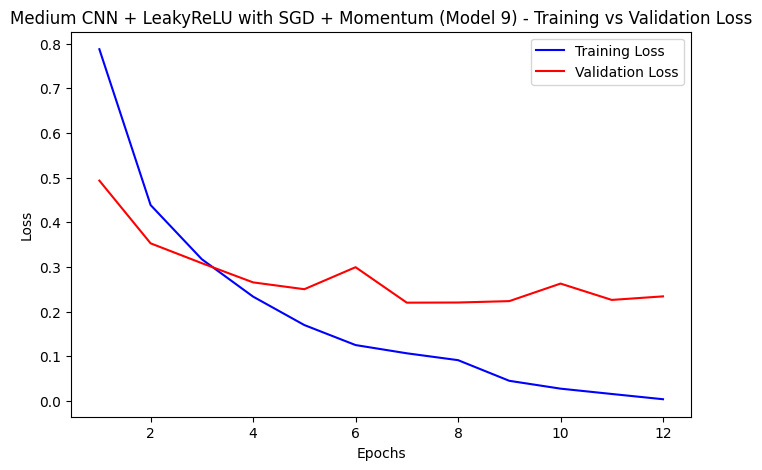

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, model_name="Model"):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call for Model
plot_loss_curves(history9, model_name="Medium CNN + LeakyReLU with SGD + Momentum (Model 9)")

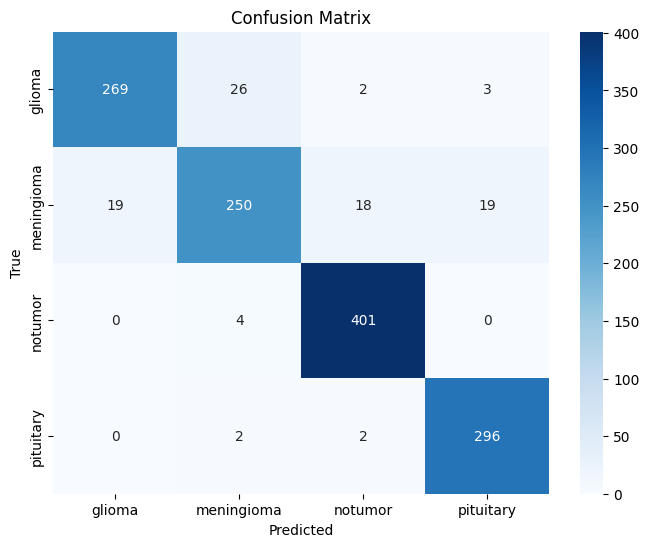


Classification Report:

              precision    recall  f1-score   support

      glioma       0.93      0.90      0.91       300
  meningioma       0.89      0.82      0.85       306
     notumor       0.95      0.99      0.97       405
   pituitary       0.93      0.99      0.96       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311



In [2]:
from plot_utils import plot_confusion_matrix_from_dataset

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model09_best.h5", test_ds, class_names)
